In [81]:
import requests
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime
from pandasql import sqldf
import statistics

In [165]:
"""Get all data from binance leaderboard by time perdiods"""

periods = ['DAILY', 'WEEKLY', 'MONTHLY', 'ALL']
statisticsTypes = ['ROI', 'PNL']
for period in periods:
    for statisticsType in statisticsTypes:
        query = {"isShared": True, "periodType": period, "statisticsType": statisticsType, "tradeType": "PERPETUAL"}
        url = 'https://www.binance.com/bapi/futures/v2/public/future/leaderboard/getLeaderboardRank'
        x = requests.post(url, json=query)

        res = x.content.decode('utf-8')
        f = open(f"data/{statisticsType}/{period}.json", "w")
        f.write(res)
        f.close()


In [166]:
"""Get UIDs from datafile, see if trader appears in futuresheroes and add data to file"""

period = 'Monthly'
type = 'PNL'

f = open(f'data/{type}/{period}.json')
data = json.load(f)
for d in data['data']:
    uid = (d['encryptedUid'])
    response = requests.get(f"https://backend.copyfuture.me/binance/leaderboard/get-user-positions?encUserId={uid}")
    data = response.content.decode('utf-8')
    if not os.path.exists(f"traders/{period}"):
        os.makedirs(f"traders/{period}")
    with open(f"traders/{period}/{uid}.json", "w") as f:
        f.write(data)
        f.close()

In [167]:
""" """
rootdir = 'traders'
df = pd.DataFrame(columns=['userId', 'symbol', 'pnl', 'roe', 'createTimeStamp', 'updateTimeStamp', 'amount', 'date',
                           'timeInTrade'])

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        t = os.path.join(subdir, file)
        f = open(t)
        data = json.load(f)

        profits = 0
        graph = []
        for trade in data[::-1]:
            if trade['closed']:
                df2 = pd.DataFrame([
                    {'userId': trade["userId"],
                     'symbol': trade["symbol"],
                     'pnl': trade['pnl'],
                     'roe': trade['roe'],
                     'createTimeStamp': trade['createTimeStamp'] / 1000,
                     'updateTimeStamp': trade['updateTimeStamp'] / 1000,
                     'amount': trade['amount'],
                     'date': datetime.fromtimestamp(trade['updateTimeStamp'] / 1000),
                     'timeInTrade': (trade['updateTimeStamp'] - trade['createTimeStamp']) / 1000
                     }])

                df = pd.concat([df, df2])

df.to_csv('data/all_trades.csv')

                             userId   symbol       pnl     roe  \
0  3981DE6572C193CB66D3FB022050B303  DOTUSDT -496.8424 -0.1452   

   createTimeStamp  updateTimeStamp  amount                    date  \
0     1.655281e+09     1.655285e+09  5000.0 2022-06-15 12:21:42.338   

   timeInTrade  
0     3810.324  
                             userId   symbol         pnl     roe  \
0  3981DE6572C193CB66D3FB022050B303  BTCUSDT  1403.53251  0.2726   

   createTimeStamp  updateTimeStamp  amount                    date  \
0     1.655282e+09     1.655289e+09     5.0 2022-06-15 13:32:48.890   

   timeInTrade  
0      7519.35  
                             userId   symbol         pnl     roe  \
0  3981DE6572C193CB66D3FB022050B303  ETHUSDT  341.831316  0.1248   

   createTimeStamp  updateTimeStamp  amount                    date  \
0     1.655294e+09     1.655305e+09   -25.0 2022-06-15 17:55:27.237   

   timeInTrade  
0    11129.814  
                             userId   symbol      pnl     roe 

In [7]:
df = pd.read_csv("data/all_trades.csv", sep=",")
df.head()

,Unnamed: 0,userId,symbol,pnl,roe,createTimeStamp,updateTimeStamp,amount,date,timeInTrade
0,0,3981DE6572C193CB66D3FB022050B303,DOTUSDT,-496.842400,-0.1452,1.655281e+09,1.655285e+09,5000.0,2022-06-15 12:21:42.338,3810.324
1,0,3981DE6572C193CB66D3FB022050B303,BTCUSDT,1403.532510,0.2726,1.655282e+09,1.655289e+09,5.0,2022-06-15 13:32:48.890,7519.350
2,0,3981DE6572C193CB66D3FB022050B303,ETHUSDT,341.831316,0.1248,1.655294e+09,1.655305e+09,-25.0,2022-06-15 17:55:27.237,11129.814
3,0,3981DE6572C193CB66D3FB022050B303,BTCUSDT,57.354300,0.0219,1.655289e+09,1.655311e+09,-2.5,2022-06-15 19:37:19.586,21686.020
4,0,3981DE6572C193CB66D3FB022050B303,BTCUSDT,759.047831,0.2905,1.655313e+09,1.655314e+09,2.5,2022-06-15 20:21:11.238,880.733


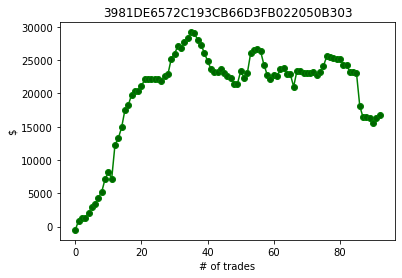

UID: 3981DE6572C193CB66D3FB022050B303
STD 7275.654026082217
First recorded trade: 5 days ago
Average profit per trade ($): 20252.666666666668


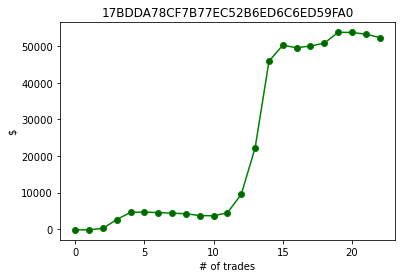

UID: 17BDDA78CF7B77EC52B6ED6C6ED59FA0
STD 23549.082718303864
First recorded trade: 113 days ago
Average profit per trade ($): 22981.652173913044


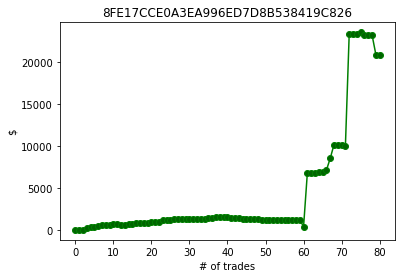

UID: 8FE17CCE0A3EA996ED7D8B538419C826
STD 7043.541928603819
First recorded trade: 38 days ago
Average profit per trade ($): 4412.555555555556


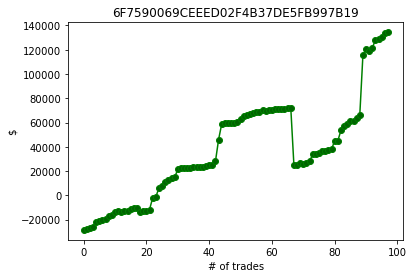

UID: 6F7590069CEEED02F4B37DE5FB997B19
STD 42038.20835769145
First recorded trade: 10 days ago
Average profit per trade ($): 36990.183673469386


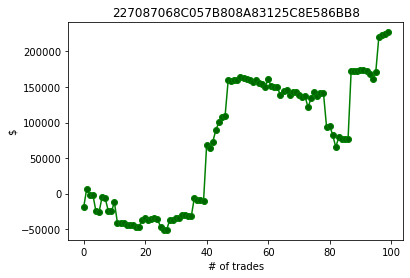

UID: 227087068C057B808A83125C8E586BB8
STD 89505.70642690269
First recorded trade: 13 days ago
Average profit per trade ($): 72966.53


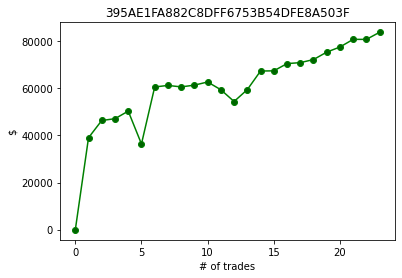

UID: 395AE1FA882C8DFF6753B54DFE8A503F
STD 18133.893333011627
First recorded trade: 79 days ago
Average profit per trade ($): 60230.75


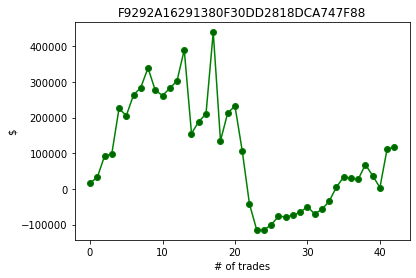

UID: F9292A16291380F30DD2818DCA747F88
STD 150074.83300154947
First recorded trade: 78 days ago
Average profit per trade ($): 99966.55813953489


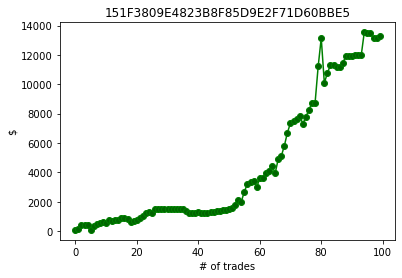

UID: 151F3809E4823B8F85D9E2F71D60BBE5
STD 4503.133508340542
First recorded trade: 6 days ago
Average profit per trade ($): 4460.0


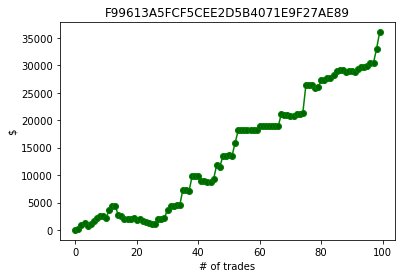

UID: F99613A5FCF5CEE2D5B4071E9F27AE89
STD 10776.846083557419
First recorded trade: 8 days ago
Average profit per trade ($): 14172.92


In [82]:
query = "select distinct userId from df"
res = sqldf(query)
trader_uids = res['userId'].to_list()

for trader in trader_uids:
    trade_no = f"Select count(userId) from df where userId = '{trader}'"
    res1 = sqldf(query)

    number_of_trades = len(res1)
    query = f"SELECT pnl from df WHERE userId = '{trader}' and {number_of_trades} > 5 order by date "
    pnl = sqldf(query)
    data = pnl
    if len(data) > 0:
        lst = []
        amount = 0
        for x in data['pnl']:
            amount += int(x)
            lst.append(amount)
        peak_profit = max(lst)
        lowest_profit = min(lst)
        if peak_profit > 500:
            plt.plot(lst, color='green', marker='o', mfc='darkgreen')  #plot the data
            plt.ylabel('$')  #set the label for y axis
            plt.xlabel('# of trades')  #set the label for x-axis
            plt.title(trader)  #set the title of the graph
            plt.show()  #display the graph
            query = f"select createTimeStamp from df WHERE userId = '{trader}'"
            date = sqldf(query)
            first_trade_time = date['createTimeStamp'].to_list()[0]
            started = datetime.now()
            diff = str(started - datetime.fromtimestamp(first_trade_time)).split(',')[0]
            print('UID:', trader)
            print('STD:', statistics.stdev(lst))
            print('First recorded trade:', diff, 'ago')
            print('Average profit per trade ($):', sum(lst) / len(lst))